In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
#from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder

C:\Users\super\AppData\Local\Temp\ipykernel_6764\4178977615.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
#1, 2
tit = pd.read_csv("titanic.csv")
tit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
tit.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
tit.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
#3
tit.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
label_encoder = LabelEncoder()
label_encoder.fit(tit["Sex"]) 
tit['Sex'] = label_encoder.transform(tit["Sex"])

tit["Embarked"] = tit["Embarked"].fillna(tit["Embarked"].mode()[0])
label_encoder.fit(tit["Embarked"])   
tit['Embarked'] = label_encoder.transform(tit["Embarked"])


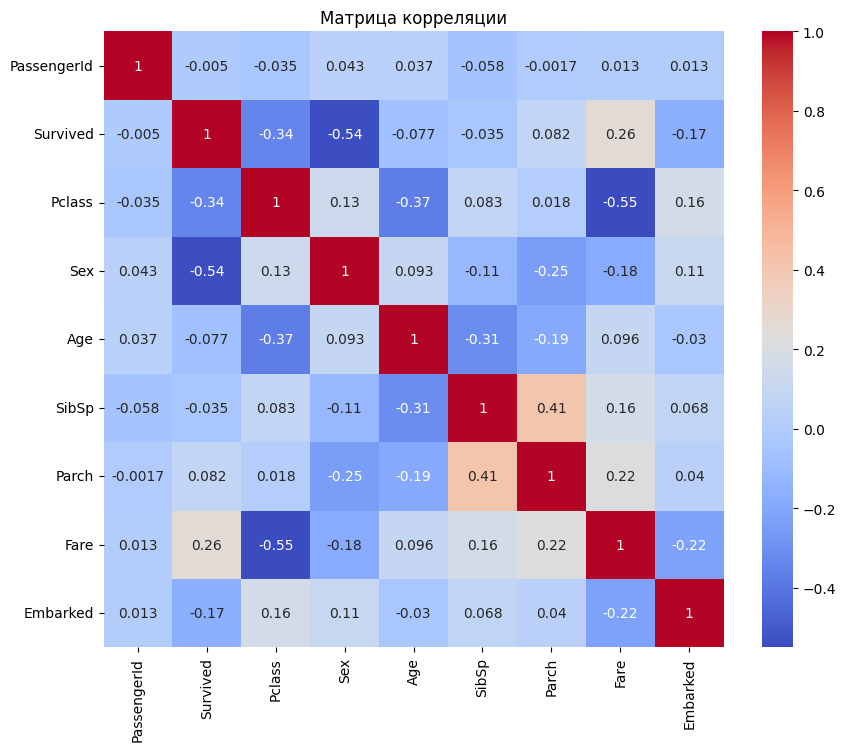

In [7]:
correlation_matrix = tit.drop(['Name', 'Ticket', 'Cabin'], axis=1).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Матрица корреляции")
plt.show()

In [8]:
tit = pd.get_dummies(tit, columns=['Name', 'Ticket', 'Cabin'])

tit.dropna()

tit["Age"]=tit["Age"].fillna(tit["Age"].mean())

In [9]:
target_distribution = tit['Survived'].value_counts()
print(target_distribution)

Survived
0    549
1    342
Name: count, dtype: int64


In [10]:
#4
X = tit.drop("Survived", axis=1)
y = tit["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Размер обучающей выборки:", X_train.shape[0])
print("Размер тестовой выборки:", X_test.shape[0])

Размер обучающей выборки: 623
Размер тестовой выборки: 268


In [11]:
#5
reg_model = LogisticRegression(max_iter=2000)
reg_model.fit(X_train, y_train)

y_pred = reg_model.predict(X_test)

In [12]:
#6
print("Точность (accuracy):", accuracy_score(y_test, y_pred))
print("Точность (precision):", precision_score(y_test, y_pred))
print("Полнота:", recall_score(y_test, y_pred))
print("F1-мера:", f1_score(y_test, y_pred))
print("Матрица ошибок:")
print(confusion_matrix(y_test, y_pred))

Точность (accuracy): 0.8171641791044776
Точность (precision): 0.81
Полнота: 0.7297297297297297
F1-мера: 0.7677725118483413
Матрица ошибок:
[[138  19]
 [ 30  81]]


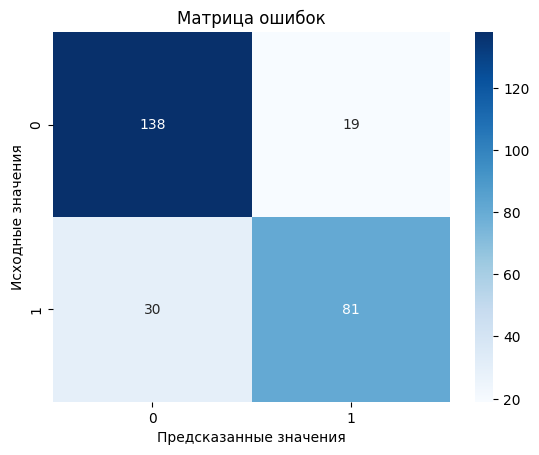

In [30]:
#7 
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='g')
plt.xlabel('Предсказанные значения')
plt.ylabel('Исходные значения')
plt.title('Матрица ошибок')
plt.show()

In [31]:
#8
y_pred_cv = cross_val_predict(reg_model, X, y, cv=5)

print("Точность (Accuracy) после кросс-валидации: ", accuracy_score(y, y_pred_cv))
print("Точность (Precision) после кросс-валидации: ", precision_score(y, y_pred_cv))
print("Полнота (Recall) после кросс-валидации: ", recall_score(y, y_pred_cv))
print("F1-мера после кросс-валидации: ", f1_score(y, y_pred_cv))
print("Матрица ошибок после кросс-валидации:")
print(confusion_matrix(y, y_pred_cv))


Точность (Accuracy) после кросс-валидации:  0.8047138047138047
Точность (Precision) после кросс-валидации:  0.7625
Полнота (Recall) после кросс-валидации:  0.7134502923976608
F1-мера после кросс-валидации:  0.7371601208459214
Матрица ошибок после кросс-валидации:
[[473  76]
 [ 98 244]]


In [32]:
def classify(name, clf):
    y_pred_clf = cross_val_predict(clf, X, y, cv=5)
    accuracy_clf = accuracy_score(y, y_pred_clf)
    precision_clf = precision_score(y, y_pred_clf)
    recall_clf = recall_score(y, y_pred_clf)
    f1_clf = f1_score(y, y_pred_clf)
    print(f"---- {name} ----")
    print(f"Точность (Accuracy): {accuracy_clf:.4f}")
    print(f"Точность (Precision): {precision_clf:.4f}")
    print(f"Полнота (Recall): {recall_clf:.4f}")
    print(f"F1-мера: {f1_clf:.4f}\n")

classify("KNN (k=3)", KNeighborsClassifier(n_neighbors=3))
classify("Random Forest", RandomForestClassifier())
classify("SVM", SVC())

---- KNN (k=3) ----
Точность (Accuracy): 0.5342
Точность (Precision): 0.3994
Полнота (Recall): 0.4240
F1-мера: 0.4113

---- Random Forest ----
Точность (Accuracy): 0.8047
Точность (Precision): 0.8621
Полнота (Recall): 0.5848
F1-мера: 0.6969

---- SVM ----
Точность (Accuracy): 0.6386
Точность (Precision): 0.7273
Полнота (Recall): 0.0936
F1-мера: 0.1658

